# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Our job as a data scientist is in this assignment is to examine a set of job postings with salaries and then predict salaries for a new set of job postings.  
During this project my aim is to answer the following questions.
1. How long did it take you to solve the problem?
2. What software language and libraries did you use to solve the problem?
3. What steps did you take to prepare the data for the project? Was any cleaning necessary?
4. What algorithmic method did you apply? Why? What other methods did you consider?
5. Describe how the algorithmic method that you chose works?
6. What features did you use? Why?
7. How did you train your model? During training, what issues concerned you?
8. How did you assess the accuracy of your predictions? Why did you choose that method?
   Would you consider any alternative approaches for assessing accuracy?
9. Which features had the greatest impact on salary? How did you identify these to be most
   significant? Which features had the least impact on salary? How did you identify these?
10. Please explain any additional work that you did as part of this project.


In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Author information:
__author__ = "Mark Aziz"
__email__ = "marcusazizas@googlemail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
train_feature = pd.read_csv("train_features.csv")
train_target = pd.read_csv("train_salaries.csv")
test_feature = pd.read_csv("test_features.csv")


### ---- 3 Clean the data ----

In [3]:
train_feature.duplicated().sum()
train_target.duplicated().sum()


0

In [4]:
train_feature.isnull().sum()


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [5]:
train_target.isnull().sum()

jobId     0
salary    0
dtype: int64

As we can see there is no duplicated data or unll data in our dataframes.

### ---- 4 Explore the data (EDA) ----

In [6]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [7]:
train_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


The head of the training features file contains a mixture of categorical and numeric features.

In [8]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


We can see the dataset we has 1 million entries.

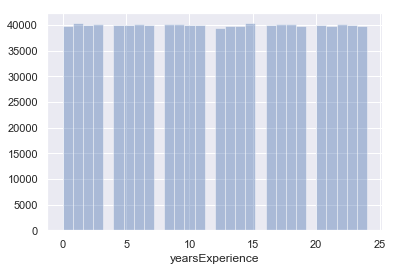

In [9]:
sns.distplot(train_feature['yearsExperience'],kde=False, bins=30)

The data is well distributed when we look at years of experience against value counts.

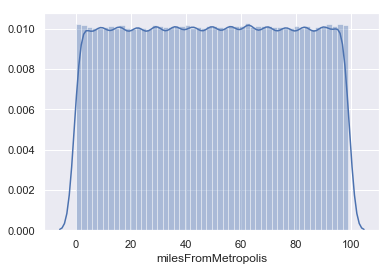

In [10]:
sns.distplot(train_feature['milesFromMetropolis'])

The data is well distributed when we look at miles from metropolis against value counts

In [11]:
final_train = pd.merge(train_feature,train_target,on='jobId')

The above line of code merges the training features database with the database with the salaries in.  Both are merged on jobID.

In [12]:
final_train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


Now we an have a look at the head of our new database to do exploratory data analysis on.

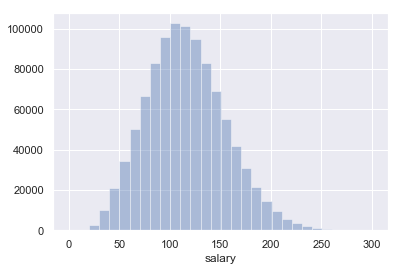

In [13]:
sns.distplot(final_train['salary'],kde=False,bins=30)

The above diagram shows the distribution of salaries throught the whole dataset.

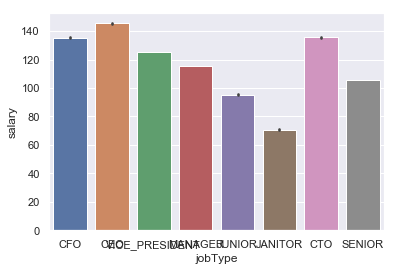

In [14]:
sns.barplot(x='jobType',y='salary', data=final_train)

In the above graph showing salary versus job type in the dataset we can conclude that CEO,CTO,CFO make the highest salaries and Junior and Janitor roles make the lower salaries.

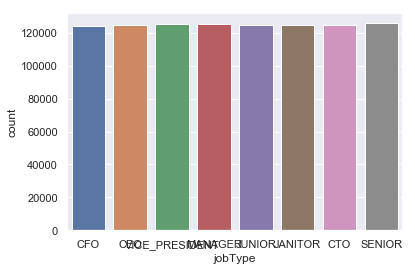

In [15]:
 sns.countplot(x='jobType', data=final_train)

In the graph above we can see that there is there is a even distrubution through the dataset of the different job types.

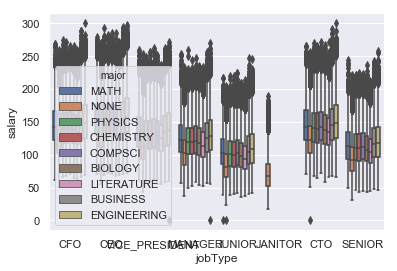

In [16]:
sns.boxplot(x='jobType',y='salary',data=final_train,hue='major')

The diagram above shows the what major the different job types have - with engineering being the strongest major to have.

In [17]:
final_train.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


There seems to be some correlation between years of experience and salary.  The more years experience you have the higher you will be paid.  This makes sense.
The further you away you are from a city the less you are likely to be paid.

In [18]:
heatmap = final_train.corr()

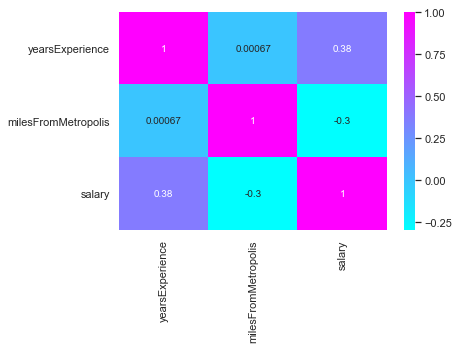

In [19]:
sns.heatmap(heatmap,annot=True,cmap='cool')

The above heatmap demonstrates the correlations between our numerical categories.

In [20]:
fp=final_train.pivot_table(index='jobType',columns='yearsExperience',values='salary')

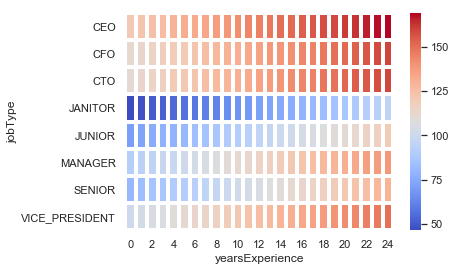

In [21]:
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidths=3)

The heatmap above is a better demonstration of how each job role against years experience shows their salary increase.

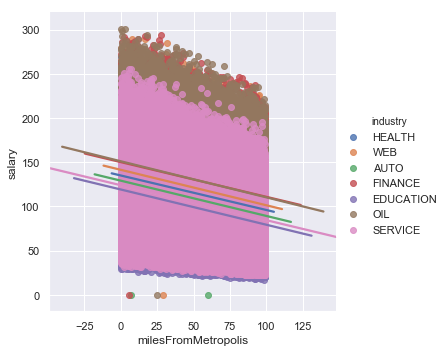

In [22]:
sns.lmplot(x='milesFromMetropolis',y='salary',hue='industry',data=final_train)

In all industries we can see clearly through the dataset that as you increase distrance from the 
metropolis the salary decrease

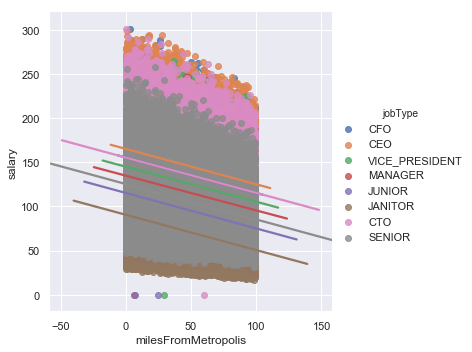

In [23]:
sns.lmplot(x='milesFromMetropolis',y='salary',hue='jobType',data=final_train)

In all job roles we can see clearly through the dataset that as you increase distrance from the metropolis the salary decreases

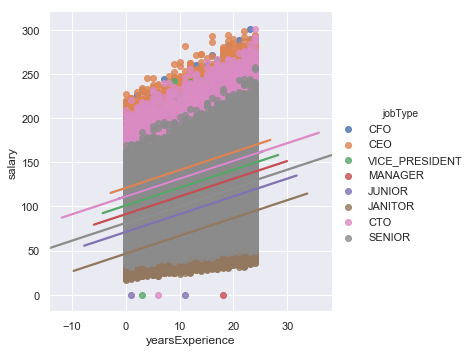

In [24]:
sns.lmplot(x='yearsExperience',y='salary',hue='jobType',data=final_train)

Above we see that across job types as years of experience increases the salary increases.

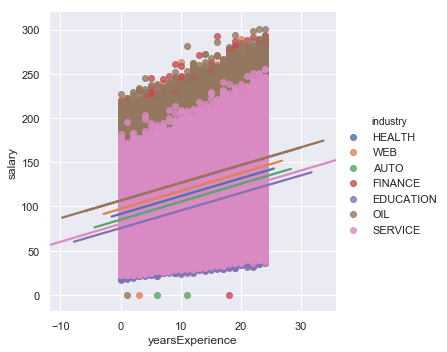

In [25]:
sns.lmplot(x='yearsExperience',y='salary',hue='industry',data=final_train)

Above we see that across industry types as years of experience increases the salary increases.

### ---- 5 Establish a baseline ----

In [26]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

Mean Squared Error (MSE) Definition. The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.  

We will use the MSE to measure the efficacy of the different models we will try to fit our data on.

I will fit the data set against different models.  I will use cross validation to measure the MSE and aim to get it below 360.

I will use the average salary for each industry and measure the MSE.

### ---- 6 Hypothesize solution ----

In [27]:
#brainstorm 4 models that you think may improve results over the baseline model based
#on your 

This is a Supervised Learning Project.

The five models which will use are:  Linear Regression, MakePipeline(PCA,StandardScaler,LR),RandomForestRegression, SVM. 

Linear Regression:  Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).  We have seen from our EDA that there is some linearilty between our factors.

Make Pipeline:  A machine learning pipeline is used to help automate machine learning workflows.  They operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome, whether positive or negative.

RandomForestRegression:  The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.  A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees 

GradientBoostRegression:  Gradient boosting regressors are a type of inductively generated tree ensemble model. At each step, a new tree is trained against the negative gradient of the loss function, which is analogous to (or identical to, in the case of least-squares error) the residual error.

Support Vector Machine 



Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

In [28]:
# Load file function
def loadfile(file):
    return pd.read_csv(file)
# Merge databases function
def merge(df1, df2, key=None, left_index=False, right_index=False):
    preparedf = pd.merge(left=df1, right=df2, how='inner', on=key, left_index=left_index, right_index=right_index)
    return preparedf
# Remove duplicates in a dataframe
def removeduplicates(preparedf):
    preparedf = preparedf.drop_duplicates(subset='jobId')
    return preparedf
# Remove salaries for jobs which are equal to zero
def removezerosalaries(preparedf):
    preparedf=preparedf[preparedf.salary>0]
    return preparedf
# Onehotencode the categorical and non-numeric values
def one_hot_encode_feature_df(df, cat_vars=None,num_vars=None):
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1,ignore_index=False)
    print('One hot encoding and concatenation is complete')
# Get Target DataFrame
def get_target_df(df, target):
    return df[target]
# Train the model using MSE
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
# Present the Average MSE and Standard Deviation
def print_statistics(model, mean_mse, cv_std):
    print('\nModel:\n is', model)
    print('Average MSE:\n is ', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])
# Write the results to file
def save_results(model, mean_mse, predictions, feature_importances):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv') 
    np.savetxt('predictions.csv', predictions, delimiter=',')

#Three files given to us to define inputs
train_feature = 'train_features.csv'
train_target = 'train_salaries.csv'
test_feature = 'test_features.csv'
# I will manually work out the categorical and numerical values and put them in two lists
categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'

#Load files
feature_df = loadfile(train_feature)
target_df = loadfile(train_target)
test_df = loadfile(test_feature)

#Use the merge function to merge the features dataframe and the target (salaries dataframe) on jobID
preparedf = merge(feature_df,target_df,key='jobId')

In [29]:
#Check the head of our raw training dataframe.
preparedf.head()
#Remove the duplicates and zero salaries.
removeduplicates(preparedf)
removezerosalaries(preparedf)
#Shuffle the training set and reset index
preparedf = shuffle((preparedf)).reset_index()
#Onehotencode categorical and numerical values in cleaned dataset and test dataset.
feature_df = one_hot_encode_feature_df(preparedf, cat_vars=categorical_vars,num_vars=numeric_vars)
test_df= one_hot_encode_feature_df(test_df, cat_vars=categorical_vars,num_vars=numeric_vars)
#Get target dataframe with salaries.
target_df = get_target_df(preparedf, target_var)

### ---- 7 Engineer features  ----

### ---- 8 Create models ----

#Model 1: Linear Regression
lr = LinearRegression() 
mean_mse = {} 
cv_std = {} 
res = {} 
num_procs = 2 
verbose_lvl = 0
train_model(lr, feature_df, target_df, num_procs, mean_mse, cv_std) 
print_statistics(lr, mean_mse, cv_std)

#Model 2: Random Forest 
mean_mse = {} 
cv_std = {} 
res = {} 
num_procs = 2 
verbose_lvl = 0
rf = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60,max_features=30, verbose=verbose_lvl)
train_model(rf, feature_df, target_df, num_procs, mean_mse, cv_std) 
print_statistics(rf, mean_mse, cv_std)



#Model 3: Pipeline
mean_mse = {} 
cv_std = {} 
res = {} 
num_procs = 2 
verbose_lvl = 0
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
model3 = lr_std_pca
train_model(lr_std_pca, feature_df, target_df, num_procs, mean_mse, cv_std) 
print_statistics(lr_std_pca, mean_mse, cv_std)

#Model 4: mean_mse = {} 
cv_std = {} 
res = {}
num_procs = 2
verbose_lvl = 0 
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=verbose_lvl) 
train_model(gbm, feature_df, target_df, num_procs, mean_mse, cv_std) 
print_statistics(gbm, mean_mse, cv_std)




#Model 5: Linear Support Vector Regression
mean_mse = {} 
cv_std = {} 
res = {} 
num_procs = 2 
verbose_lvl = 0
from sklearn.svm import LinearSVR
lin_svr = LinearSVR(random_state=42)
model5=lin_svr
train_model(lin_svr,feature_df,target_df,num_procs,mean_mse,cv_std)
print_statistics(model5,mean_mse,cv_std)

### ---- 9 Train models ----

The best model was the Gradient Boot Regressor gave the best MSE score at just over 357.


### ---- 10 Select best model  ----

In [34]:
#train model on entire dataset
gbm.fit(feature_df, target_df)

#create predictions based on test data
predictions = gbm.predict(test_df)

In [36]:
print("feature importance plotting...")
gbm.fit(test_df,target_df)
feature_importances = pd.Series(gbm.feature_importances_, index=test_df.columns)
print(feature_importances)
    

feature importance plotting...
companyId_COMP0           0.003374
companyId_COMP1           0.003964
companyId_COMP10          0.003842
companyId_COMP11          0.003963
companyId_COMP12          0.001539
companyId_COMP13          0.004410
companyId_COMP14          0.002647
companyId_COMP15          0.003718
companyId_COMP16          0.001415
companyId_COMP17          0.003551
companyId_COMP18          0.001604
companyId_COMP19          0.000356
companyId_COMP2           0.002675
companyId_COMP20          0.004229
companyId_COMP21          0.002483
companyId_COMP22          0.003678
companyId_COMP23          0.003882
companyId_COMP24          0.002330
companyId_COMP25          0.004425
companyId_COMP26          0.002134
companyId_COMP27          0.003241
companyId_COMP28          0.002173
companyId_COMP29          0.004489
companyId_COMP3           0.002335
companyId_COMP30          0.000639
companyId_COMP31          0.000494
companyId_COMP32          0.001420
companyId_COMP33        

In [44]:
feature_importances[::-1] 


milesFromMetropolis       0.257965
yearsExperience           0.166104
industry_WEB              0.014373
industry_SERVICE          0.013919
industry_OIL              0.012357
industry_HEALTH           0.010154
industry_FINANCE          0.017187
industry_EDUCATION        0.014749
industry_AUTO             0.013188
major_PHYSICS             0.016097
major_NONE                0.005923
major_MATH                0.014686
major_LITERATURE          0.013196
major_ENGINEERING         0.014979
major_COMPSCI             0.016307
major_CHEMISTRY           0.014337
major_BUSINESS            0.013340
major_BIOLOGY             0.011691
degree_NONE               0.009432
degree_MASTERS            0.015851
degree_HIGH_SCHOOL        0.007597
degree_DOCTORAL           0.015052
degree_BACHELORS          0.013952
jobType_VICE_PRESIDENT    0.018531
jobType_SENIOR            0.014600
jobType_MANAGER           0.014784
jobType_JUNIOR            0.010081
jobType_JANITOR           0.009718
jobType_CTO         

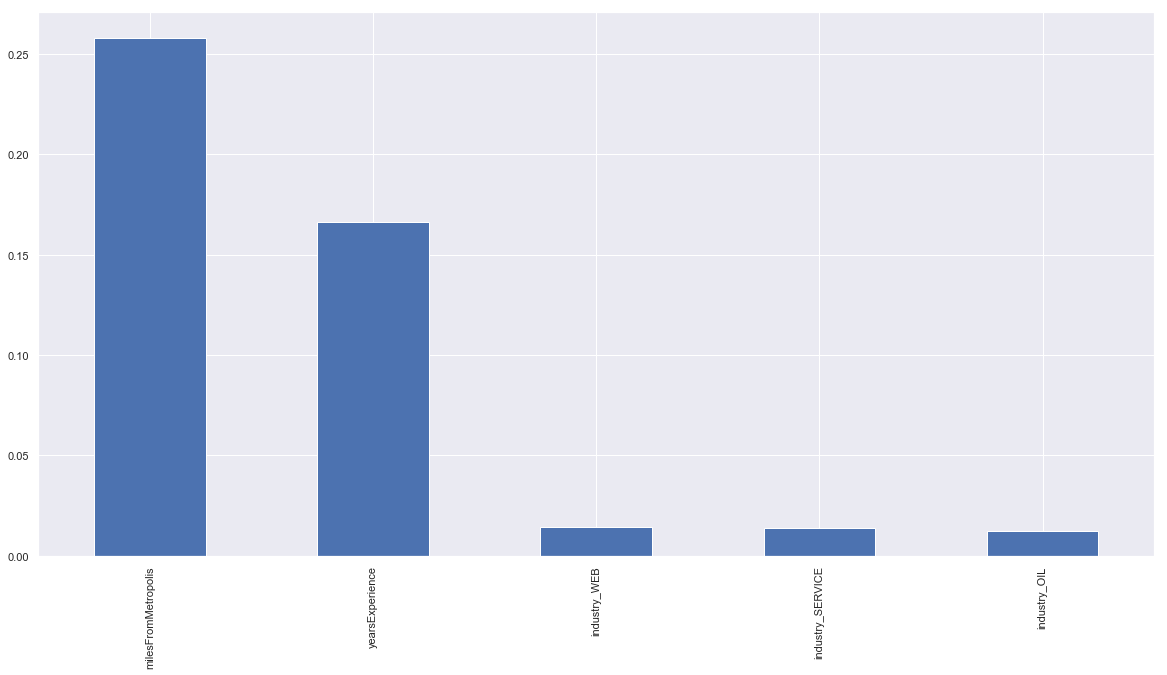

In [41]:
newfi[0:5].plot.bar(figsize=(20,10)) 
plt.show()


In [43]:
save_results(gbm, mean_mse[gbm], predictions, feature_importances)

KeyError: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

newfi = feature_importances[::-1]
newfi.head()




newfi[0:5].plot.bar(figsize=(20,10))
plt.show()


save_results(model, mean_mse[model], predictions, feature_importances)